In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
swapnilpanda_heart_sound_database_path = kagglehub.dataset_download('swapnilpanda/heart-sound-database')

print('Data source import complete.')


100%|██████████| 173M/173M [00:02<00:00, 84.7MB/s]

Extracting files...


Data source import complete.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with sound
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

In [2]:
data_path = "/content/drive/MyDrive/Dataset/heart_sound"

In [3]:
tarin_data = data_path +"/train/"
val_data   = data_path + "/val/"

train_healthy_data   = tarin_data + '/healthy/'
train_unhealthy_data = tarin_data + '/unhealthy/'
val_healthy_data     = val_data   + '/healthy/'
val_unhealthy_data   = val_data   + '/unhealthy/'

In [4]:
print(os.listdir(data_path))

['.DS_Store', 'val', 'train']


In [5]:
print(len(os.listdir(train_healthy_data))) #length of healthy training sounds
print(len(os.listdir(train_unhealthy_data))) #length of unhelathy training sounds
print('TOTAL TRAIN SOUNDS:', len(os.listdir(train_healthy_data)) + len(os.listdir(train_unhealthy_data)))

2575
665
TOTAL TRAIN SOUNDS: 3240


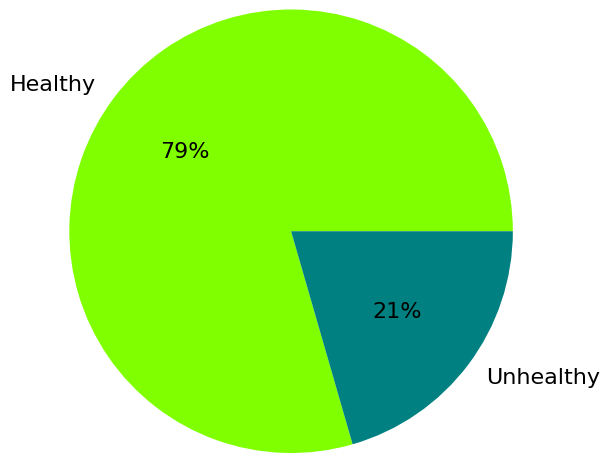

In [6]:
x = np.array([len(os.listdir(train_healthy_data)),len(os.listdir(train_unhealthy_data))])
labels = ['Healthy', 'Unhealthy']
colors = {'Healthy': 'chartreuse','Unhealthy': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

In [7]:
# Choose random soud from healthy folder
random_healthy= np.random.randint(0,len(os.listdir(train_healthy_data)))
healthy_sound = os.listdir(train_healthy_data)[random_healthy]
healthy_sound_address = train_healthy_data+healthy_sound
healthy_sound_sample,sample_rate = librosa.load(healthy_sound_address)
ipd.Audio(healthy_sound_sample,rate=sample_rate)

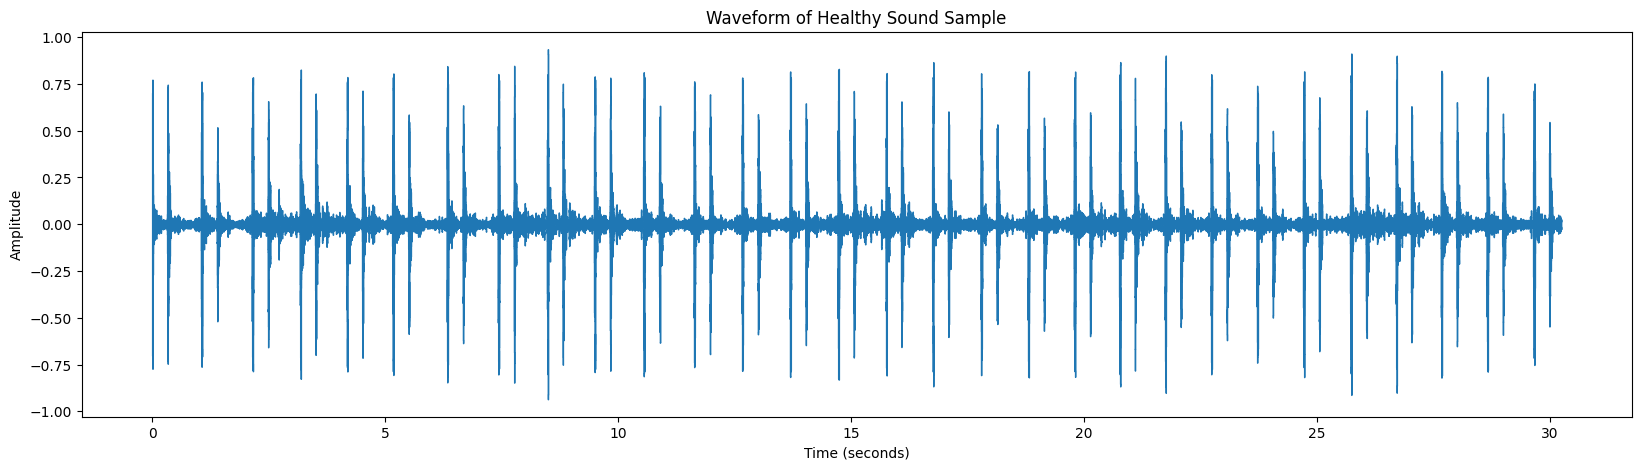

In [8]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming healthy_sound_sample and sample_rate are already defined
plt.figure(figsize=(20, 5))
librosa.display.waveshow(healthy_sound_sample, sr=sample_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Healthy Sound Sample")
plt.show()


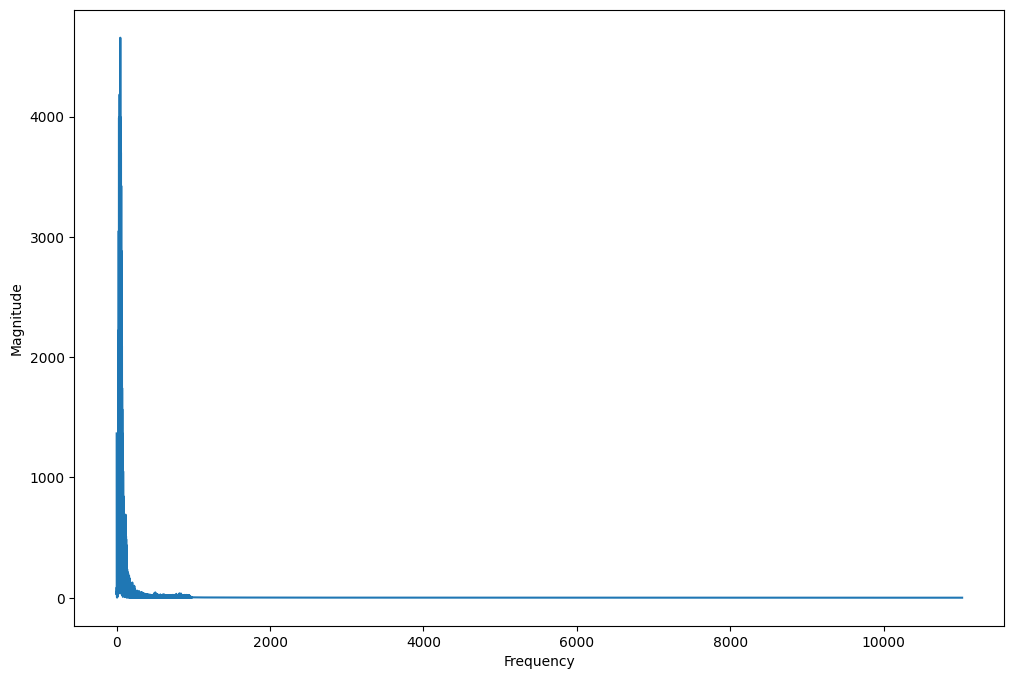

In [9]:
fft_healthy = np.fft.fft(healthy_sound_sample)
magnitude_healthy = np.abs(fft_healthy)
freq_healthy = np.linspace(0,sample_rate, len(magnitude_healthy))
half_freq = freq_healthy[:int(len(freq_healthy)/2)]
half_magnitude = magnitude_healthy[:int(len(freq_healthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

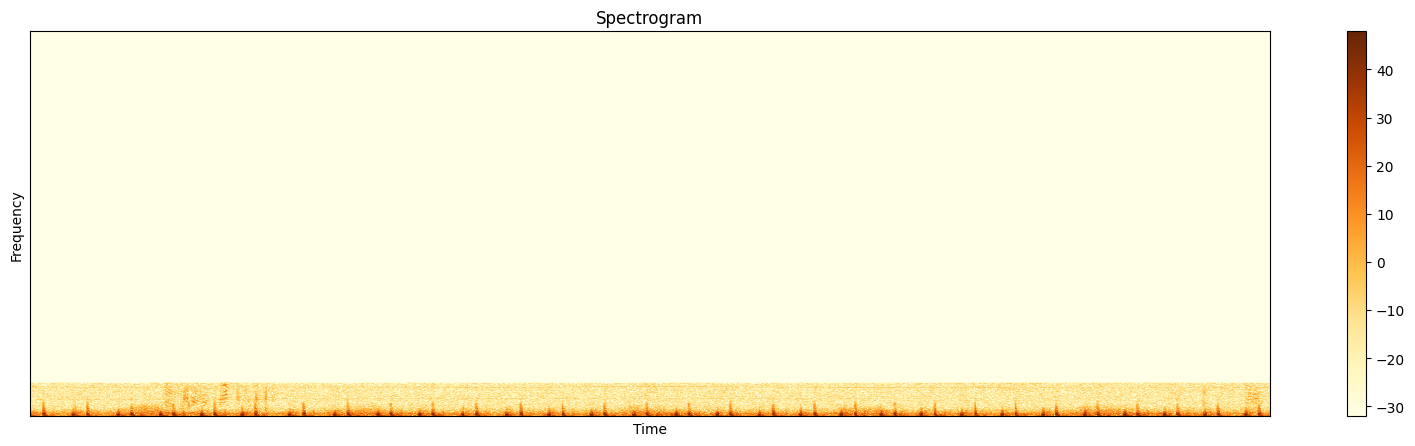

In [10]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_healthy = librosa.stft(healthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_healthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

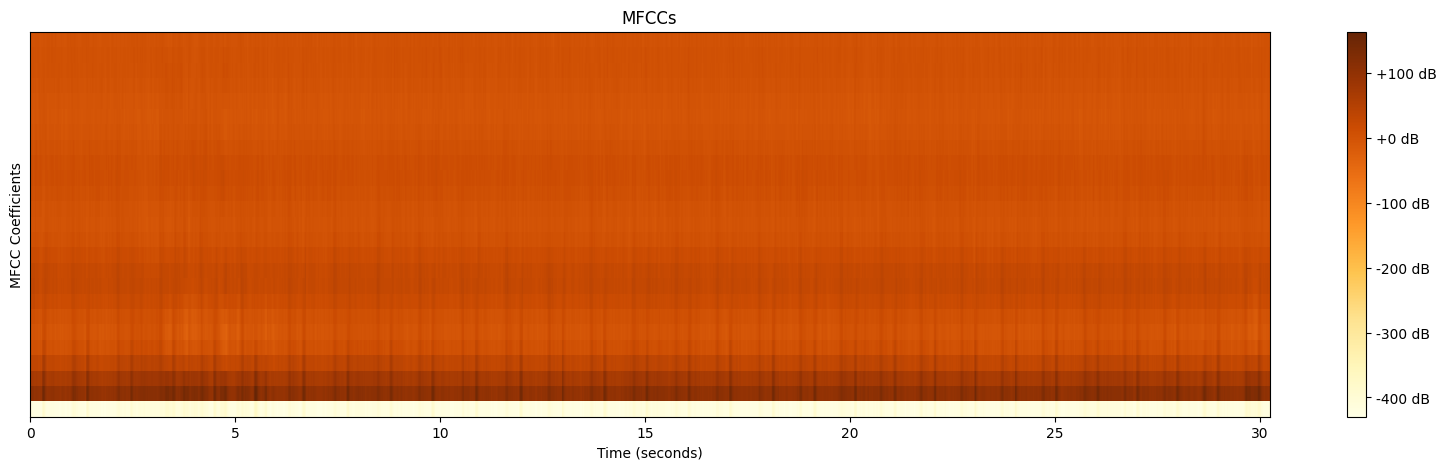

In [11]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Define parameters
n_fft = 2048      # Number of FFT components
hop_length = 512  # Number of samples between successive frames

# Extract 25 MFCCs using keyword arguments
MFCCs = librosa.feature.mfcc(
    y=healthy_sound_sample,
    sr=sample_rate,
    n_mfcc=25,
    n_fft=n_fft,
    hop_length=hop_length
)

# Display MFCCs
plt.figure(figsize=(20, 5))
librosa.display.specshow(
    MFCCs,
    sr=sample_rate,
    hop_length=hop_length,
    x_axis='time'
)
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.colorbar(format='%+2.0f dB')
plt.set_cmap("YlOrBr")
plt.title("MFCCs")
plt.show()


In [12]:
# Choose random soud from unhealthy folder
random_unhealthy= np.random.randint(0,len(os.listdir(train_unhealthy_data)))
unhealthy_sound = os.listdir(train_unhealthy_data)[random_unhealthy]
unhealthy_sound_address = train_unhealthy_data+unhealthy_sound
unhealthy_sound_sample,sample_rate = librosa.load(unhealthy_sound_address)
ipd.Audio(unhealthy_sound_sample,rate=sample_rate)

### Waveform

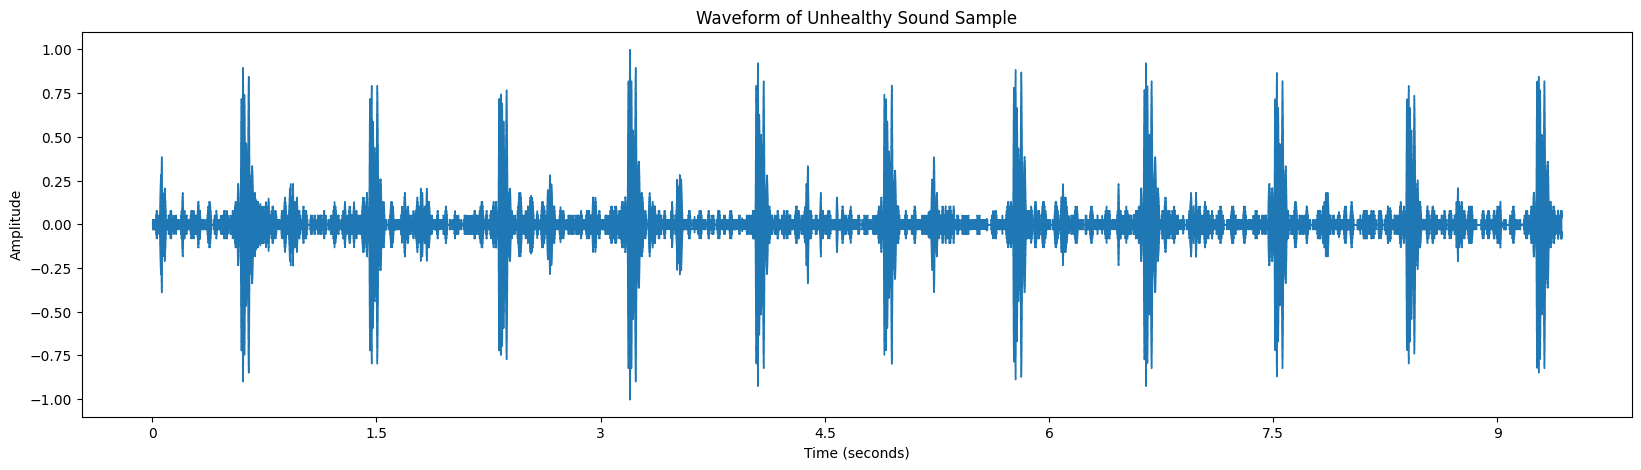

In [13]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming unhealthy_sound_sample and sample_rate are already defined
plt.figure(figsize=(20, 5))
librosa.display.waveshow(unhealthy_sound_sample, sr=sample_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform of Unhealthy Sound Sample")
plt.show()


### Spectrum

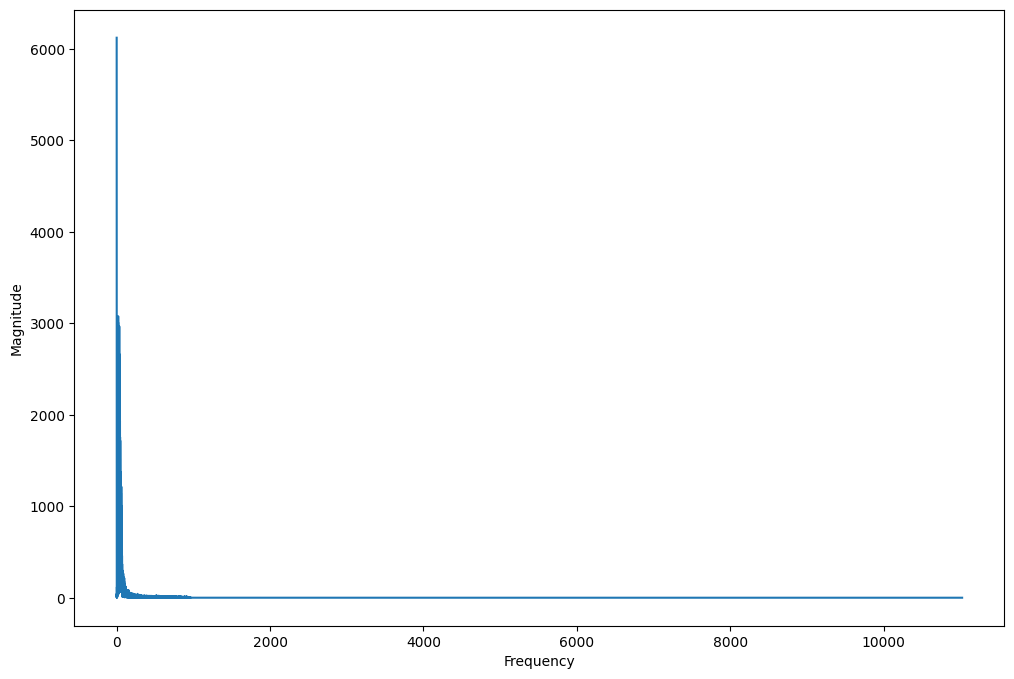

In [14]:
fft_unhealthy = np.fft.fft(unhealthy_sound_sample)
magnitude_unhealthy = np.abs(fft_unhealthy)
freq_unhealthy = np.linspace(0,sample_rate, len(magnitude_unhealthy))
half_freq = freq_unhealthy[:int(len(freq_unhealthy)/2)]
half_magnitude = magnitude_unhealthy[:int(len(freq_unhealthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

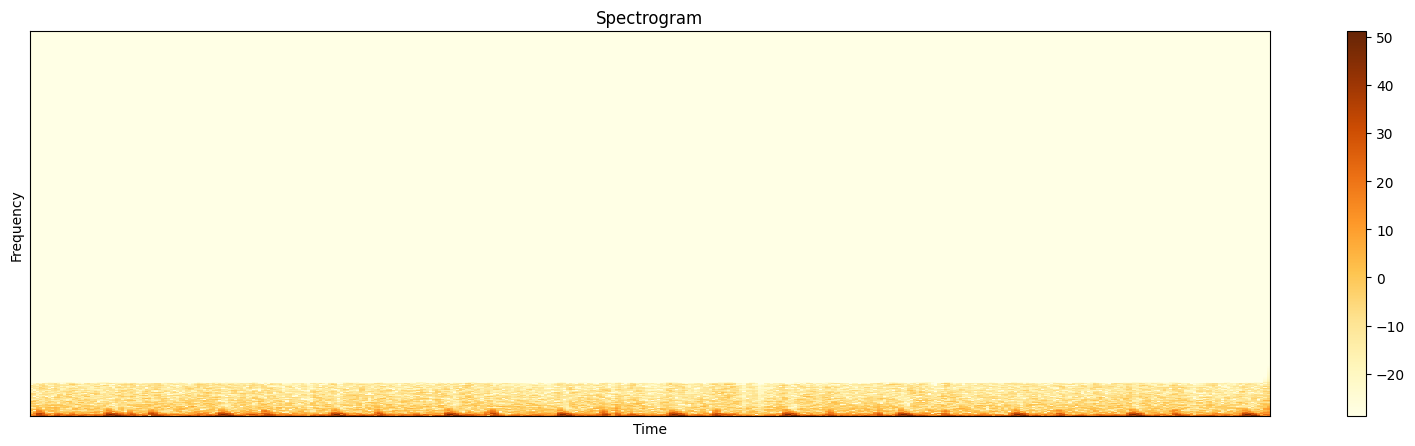

In [15]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_unhealthy = librosa.stft(unhealthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_unhealthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

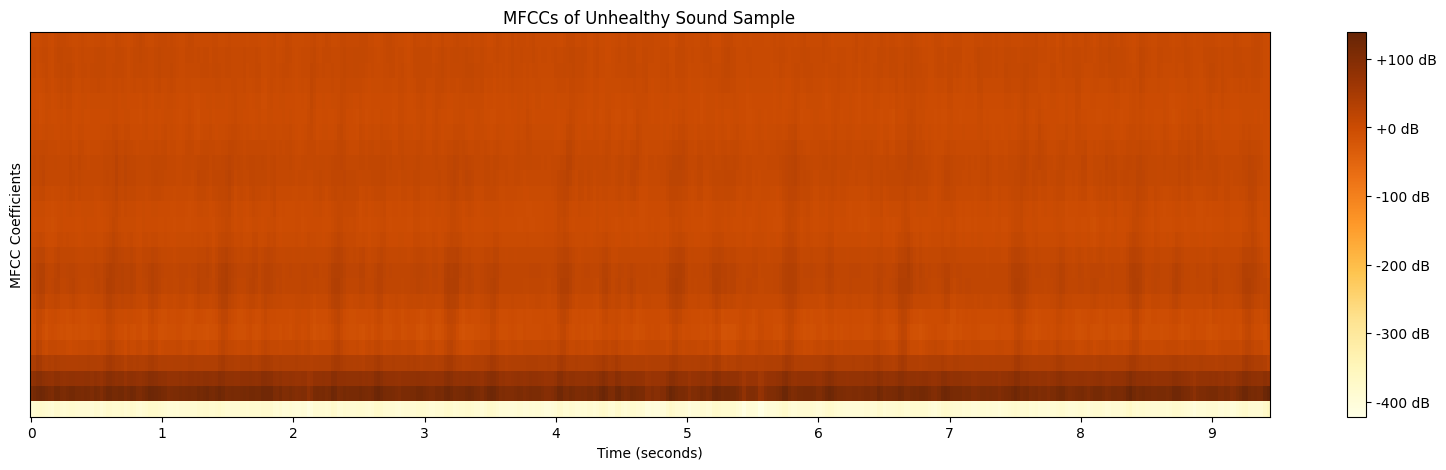

In [16]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Define parameters
n_fft = 2048          # Number of FFT components
hop_length = 512      # Number of samples between successive frames

# Extract 25 MFCCs using keyword arguments
MFCCs = librosa.feature.mfcc(
    y=unhealthy_sound_sample,
    sr=sample_rate,
    n_mfcc=25,
    n_fft=n_fft,
    hop_length=hop_length
)

# Display MFCCs
plt.figure(figsize=(20, 5))  # Adjusted to match sample code for consistency
librosa.display.specshow(
    MFCCs,
    sr=sample_rate,
    hop_length=hop_length,
    x_axis='time'  # Adds time labels on the x-axis
)
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.colorbar(format='%+2.0f dB')  # Adds a colorbar with dB formatting
plt.set_cmap("YlOrBr")  # Sets the colormap to Yellow-Orange-Brown for better visualization
plt.title("MFCCs of Unhealthy Sound Sample")
plt.show()


# Loading data

In [49]:
def load_file_data(folder, file_names, duration=10, sr=22050, n_mfcc=25, max_pad_len=400):
    """
    Load audio files and extract MFCC features without averaging across time frames.

    Parameters:
    - folder (str): Path to the folder containing audio files.
    - file_names (list): List of audio file names to load.
    - duration (int, optional): Maximum duration of audio clips in seconds. Defaults to 10.
    - sr (int, optional): Sampling rate. Defaults to 22050 Hz.
    - n_mfcc (int, optional): Number of MFCCs to extract. Defaults to 25.
    - max_pad_len (int, optional): Maximum number of time frames to pad/truncate the MFCCs. Defaults to 400.

    Returns:
    - data (list): List of padded/truncated MFCC feature arrays.
    """
    data = []
    for file_name in file_names:
        try:
            sound_file = os.path.join(folder, file_name)
            print(f"Loading file: {sound_file}")
            # Load the audio file with librosa
            X, sr = librosa.load(sound_file, sr=sr, duration=duration, res_type='kaiser_fast')
            dur = librosa.get_duration(y=X, sr=sr)

            # Check if audio is shorter than required duration
            if dur < duration:
                print(f"Fixing audio length for file: {file_name}")
                X = librosa.util.fix_length(X, size=sr * duration)

            # Extract MFCCs without averaging
            mfccs = librosa.feature.mfcc(y=X, sr=sr, n_mfcc=n_mfcc)

            # Pad or truncate MFCCs to ensure uniform input size
            if mfccs.shape[1] < max_pad_len:
                pad_width = max_pad_len - mfccs.shape[1]
                mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
            else:
                mfccs = mfccs[:, :max_pad_len]

            # Normalize MFCCs
            mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

            # Expand dimensions for CNN (if using Conv2D) or keep as is for Conv1D
            mfccs = mfccs[..., np.newaxis]  # Shape: (n_mfcc, max_pad_len, 1)

            data.append(mfccs)
        except Exception as e:
            print(f"Error encountered while parsing file: {file_name}. Error: {e}")
    return data


In [50]:
SAMPLE_RATE = 22050          # Sampling rate in Hz
MAX_SOUND_CLIP_DURATION = 10 # Maximum duration of audio clips in seconds


# Function to fetch .wav files (if not already defined)
def get_wav_files(folder):
    return fnmatch.filter(os.listdir(folder), '*.wav')

# Load Healthy Training Sounds
healthy_files = get_wav_files(train_healthy_data)
healthy_sounds = load_file_data(
    folder=train_healthy_data,
    file_names=healthy_files,
    duration=MAX_SOUND_CLIP_DURATION,
    sr=SAMPLE_RATE,
    n_mfcc=25,
    max_pad_len=400  # Adjust based on your data's characteristics
)
healthy_labels = [0 for _ in healthy_sounds]  # 0 indicates Healthy

# Load Unhealthy Training Sounds
unhealthy_files = get_wav_files(train_unhealthy_data)
unhealthy_sounds = load_file_data(
    folder=train_unhealthy_data,
    file_names=unhealthy_files,
    duration=MAX_SOUND_CLIP_DURATION,
    sr=SAMPLE_RATE,
    n_mfcc=25,
    max_pad_len=400
)
unhealthy_labels = [1 for _ in unhealthy_sounds]  # 1 indicates Unhealthy

print("Loaded training dataset successfully.")


Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01189.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01344.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01183.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01316.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01195.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01278.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01228.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01199.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01266.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01345.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01303.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/train//healthy/e01258.wav
Load

In [51]:
# Load Healthy Validation Sounds
val_healthy_files = get_wav_files(val_healthy_data)
val_healthy_sounds = load_file_data(
    folder=val_healthy_data,
    file_names=val_healthy_files,
    duration=MAX_SOUND_CLIP_DURATION,
    sr=SAMPLE_RATE
)
val_healthy_labels = [0 for _ in val_healthy_sounds]  # 0 indicates Healthy

# Load Unhealthy Validation Sounds
val_unhealthy_files = get_wav_files(val_unhealthy_data)
val_unhealthy_sounds = load_file_data(
    folder=val_unhealthy_data,
    file_names=val_unhealthy_files,
    duration=MAX_SOUND_CLIP_DURATION,
    sr=SAMPLE_RATE
)
val_unhealthy_labels = [1 for _ in val_unhealthy_sounds]  # 1 indicates Unhealthy

print("Loaded validation dataset successfully.")


Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/e00036.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/a0016.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/e00010.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/a0105.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/e00018.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/e00012.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/b0067.wav
Fixing audio length for file: b0067.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/a0025.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/b0006.wav
Fixing audio length for file: b0006.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/b0049.wav
Fixing audio length for file: b0049.wav
Loading file: /content/drive/MyDrive/Dataset/heart_sound/val//healthy/b0039.

In [72]:
# Concatenate training data and labels
x_data = np.array(healthy_sounds + unhealthy_sounds)
y_data = np.array(healthy_labels + unhealthy_labels)

# Concatenate validation data and labels
test_x = np.array(val_healthy_sounds + val_unhealthy_sounds)
test_y = np.array(val_healthy_labels + val_unhealthy_labels)

print(f"Combined Training Data Records: {len(y_data)}")
print(f"Combined Validation Data Records: {len(test_y)}")


Combined Training Data Records: 3240
Combined Validation Data Records: 301


In [75]:
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
seed = 100

# Split data into Train (80%) and Temp (20%)
x_train, x_temp, y_train, y_temp = train_test_split(
    x_data, y_data,
    train_size=0.8,
    random_state=seed,
    shuffle=True,
    stratify=y_data
)

# Further split Temp into Validation (80% of Train) and Test (20% of Train)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    train_size=0.8,
    random_state=seed,
    shuffle=True,
    stratify=y_train
)

# One-Hot Encoding for labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test_encoded = tf.keras.utils.to_categorical(test_y, num_classes=2)

print("Label Encoding Completed.")
print(f"Training Data Shape: {x_train.shape}")
print(f"Validation Data Shape: {x_val.shape}")
print(f"Test Data Shape: {test_x.shape}")


Label Encoding Completed.
Training Data Shape: (2073, 25, 400, 1)
Validation Data Shape: (519, 25, 400, 1)
Test Data Shape: (301, 25, 400, 1)


In [76]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Computed Class Weights:", class_weight_dict)


Computed Class Weights: {0: 0.6289441747572816, 1: 2.438823529411765}


In [61]:
# Reshape the data to match the expected input shape for CNN-LSTM
# Current shape: (batch_size, 25, 400, 1)
# Desired shape: (batch_size, 400, 25)

# Remove the last dimension as Conv1D expects (steps, features)
x_train = x_train.reshape(x_train.shape[0], 400, 25)
x_val = x_val.reshape(x_val.shape[0], 400, 25)
test_x = test_x.reshape(test_x.shape[0], 400, 25)

print(f"Reshaped Training Data Shape: {x_train.shape}")
print(f"Reshaped Validation Data Shape: {x_val.shape}")
print(f"Reshaped Test Data Shape: {test_x.shape}")


Reshaped Training Data Shape: (2073, 400, 25)
Reshaped Validation Data Shape: (519, 400, 25)
Reshaped Test Data Shape: (301, 400, 25)


In [81]:
import numpy as np

# Original Data Shapes
print(f"Original Training Data Shape: {x_train.shape}")
print(f"Original Validation Data Shape: {x_val.shape}")
print(f"Original Test Data Shape: {test_x.shape}")

# Check if data is already 4D
if x_train.ndim == 4:
    # Transpose axes from (samples, 25, 400, 1) to (samples, 400, 25, 1)
    x_train = np.transpose(x_train, (0, 2, 1, 3))
    x_val = np.transpose(x_val, (0, 2, 1, 3))
    test_x = np.transpose(test_x, (0, 2, 1, 3))

    print("Transposed Training Data Shape:", x_train.shape)
    print("Transposed Validation Data Shape:", x_val.shape)
    print("Transposed Test Data Shape:", test_x.shape)

    # Verify channel dimension is present
    if x_train.shape[-1] != 1:
        print("Adding channel dimension.")
        x_train = np.expand_dims(x_train, axis=-1)
        x_val = np.expand_dims(x_val, axis=-1)
        test_x = np.expand_dims(test_x, axis=-1)
        print("Added channel dimension.")
        print(f"New Training Data Shape: {x_train.shape}")
        print(f"New Validation Data Shape: {x_val.shape}")
        print(f"New Test Data Shape: {test_x.shape}")
    else:
        print("Channel dimension is already present.")
else:
    # If data is not 4D, reshape accordingly
    print(f"x_train has {x_train.ndim} dimensions, expected 4 dimensions.")
    if x_train.ndim == 3:
        # Reshape from (samples, 400, 25) to (samples, 400, 25, 1)
        x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
        x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
        test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

        print("Reshaped x_train, x_val, and test_x to add the channel dimension.")
        print(f"Reshaped Training Data Shape: {x_train.shape}")
        print(f"Reshaped Validation Data Shape: {x_val.shape}")
        print(f"Reshaped Test Data Shape: {test_x.shape}")
    else:
        raise ValueError("x_train has an unexpected number of dimensions. Cannot reshape.")


Original Training Data Shape: (2073, 25, 400, 1)
Original Validation Data Shape: (519, 25, 400, 1)
Original Test Data Shape: (301, 25, 400, 1)
Transposed Training Data Shape: (2073, 400, 25, 1)
Transposed Validation Data Shape: (519, 400, 25, 1)
Transposed Test Data Shape: (301, 400, 25, 1)
Channel dimension is already present.


In [82]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Dropout

def residual_block_2d(x, filters, kernel_size=(3,3), stride=(1,1)):
    """
    Defines a 2D residual block with two Conv2D layers.

    Parameters:
    - x: Input tensor.
    - filters: Number of filters for Conv2D layers.
    - kernel_size: Kernel size for Conv2D layers.
    - stride: Stride for the first Conv2D layer.

    Returns:
    - Output tensor after applying the residual block.
    """
    shortcut = x

    # First convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)

    # Adjust shortcut if necessary
    if stride != (1,1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters=filters, kernel_size=(1,1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

def build_resnet_2d(input_shape, num_classes):
    """
    Builds a 2D ResNet-like model.

    Parameters:
    - input_shape: Shape of the input data (e.g., (400, 25, 1)).
    - num_classes: Number of output classes.

    Returns:
    - Compiled ResNet model.
    """
    inputs = Input(shape=input_shape)

    # Initial Conv2D layer
    x = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # MaxPooling
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual Blocks
    x = residual_block_2d(x, filters=64)
    x = residual_block_2d(x, filters=64)

    x = residual_block_2d(x, filters=128, stride=(2,2))
    x = residual_block_2d(x, filters=128)

    x = residual_block_2d(x, filters=256, stride=(2,2))
    x = residual_block_2d(x, filters=256)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Build the ResNet model with input_shape=(400,25,1)
resnet_2d_model = build_resnet_2d(input_shape=(400,25,1), num_classes=2)

# Compile the model
resnet_2d_model.compile(
    loss='categorical_crossentropy',  # Suitable for multi-class classification with softmax
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Display the model summary
resnet_2d_model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 400, 25, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 200, 13, 64)    │          3,200 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_35    │ (None, 200, 13, 64)    │            256 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 200, 13, 64)    │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 100, 7, 64)     │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 100, 7, 64)     │            256 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_30[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 100, 7, 64)     │            256 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│                           │                        │                │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_31             │ (None, 100, 7, 64)     │              0 │ add_12[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)   

 Total params: 2,886,722 (11.01 MB)

 Trainable params: 2,882,114 (10.99 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [83]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Increased patience for deeper models
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

checkpoint = ModelCheckpoint(
    'best_resnet2d_model.keras',  # Updated filepath with .keras extension
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [84]:
print("Training ResNet model... Please wait.")

# Train the ResNet model
history_resnet = resnet_2d_model.fit(
    x_train, y_train_encoded,
    batch_size=16,
    epochs=100,  # Increased epochs for deeper learning
    validation_data=(x_val, y_val_encoded),
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

print("ResNet training finished!")


Training ResNet model... Please wait.
Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.6415 - loss: 0.9318
Epoch 1: val_loss improved from inf to 0.70308, saving model to best_resnet2d_model.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6414 - loss: 0.9303 - val_accuracy: 0.4663 - val_loss: 0.7031 - learning_rate: 0.0010
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.6700 - loss: 0.5432
Epoch 2: val_loss did not improve from 0.70308
130/130 ━━━━━━━━━━━━━━━━━━━━ 132s 967ms/step - accuracy: 0.6698 - loss: 0.5433 - val_accuracy: 0.2620 - val_loss: 1.0015 - learning_rate: 0.0010
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.6855 - loss: 0.5415
Epoch 3: val_loss did not improve from 0.70308
130/130 ━━━━━━━━━━━━━━━━━━━━ 129s 996ms/step - accuracy: 0.6856 - loss: 0.5413 - val_accuracy: 0.4123 - val_loss: 0.7088 - learning_rate: 0.0010
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.7165 - los

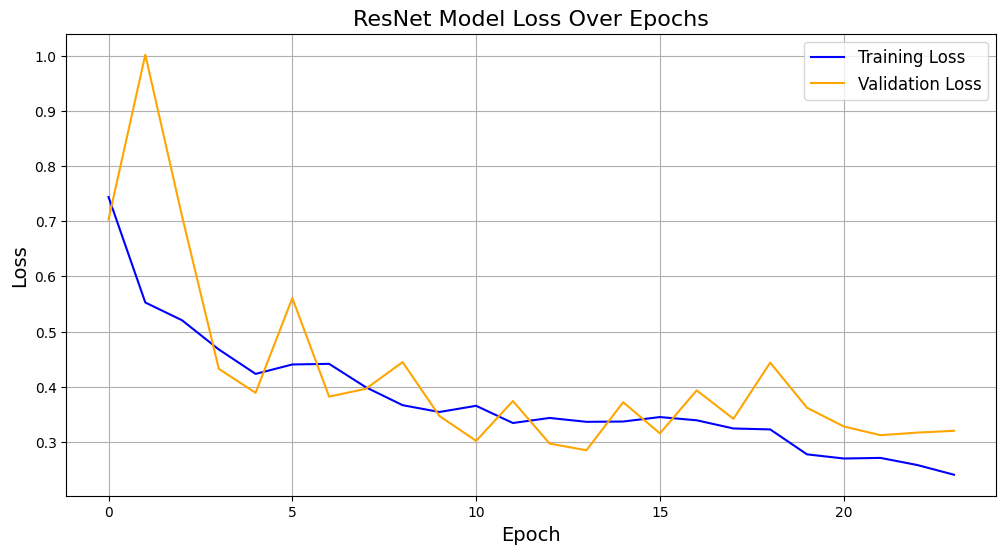

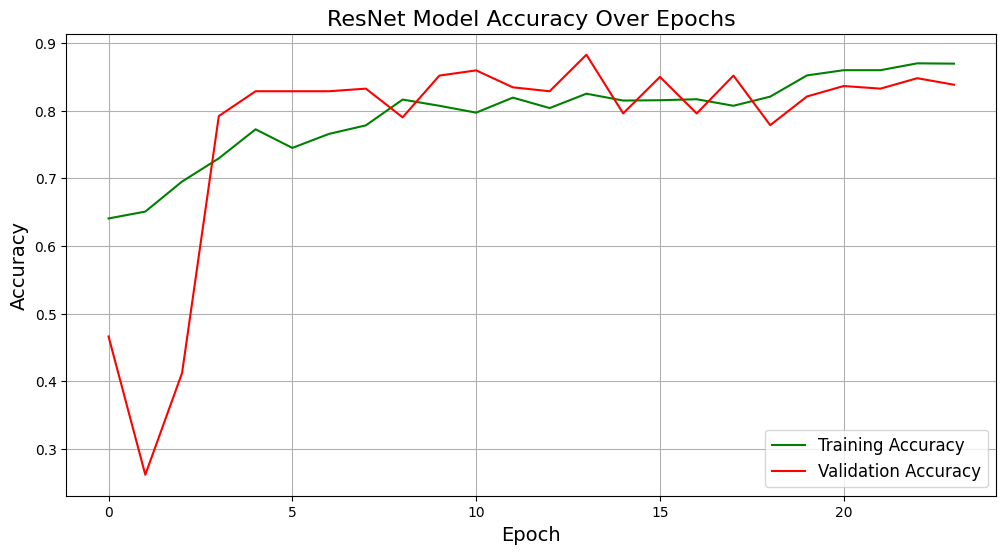

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert history.history to a pandas DataFrame
history_resnet_df = pd.DataFrame(history_resnet.history)

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history_resnet_df['loss'], label='Training Loss', color='blue')
plt.plot(history_resnet_df['val_loss'], label='Validation Loss', color='orange')
plt.title('ResNet Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_resnet_df['accuracy'], label='Training Accuracy', color='green')
plt.plot(history_resnet_df['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('ResNet Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Evaluate the ResNet model on the test set
resnet_scores = resnet_2d_model.evaluate(test_x, y_test_encoded, verbose=0)
print(f"ResNet Model Evaluation Accuracy: {round(resnet_scores[1]*100, 2)}%")

# Make predictions with the ResNet model
resnet_y_pred = resnet_2d_model.predict(test_x, batch_size=16)
resnet_y_pred_classes = np.argmax(resnet_y_pred, axis=1)
resnet_y_true = np.argmax(y_test_encoded, axis=1)

# Classification Report
resnet_target_names = ["Healthy", "Unhealthy"]
print(classification_report(resnet_y_true, resnet_y_pred_classes, target_names=resnet_target_names))


ResNet Model Evaluation Accuracy: 74.42%
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step
              precision    recall  f1-score   support

     Healthy       0.72      0.79      0.76       150
   Unhealthy       0.77      0.70      0.73       151

    accuracy                           0.74       301
   macro avg       0.75      0.74      0.74       301
weighted avg       0.75      0.74      0.74       301



Confusion Matrix, without normalization
[[119  31]
 [ 46 105]]


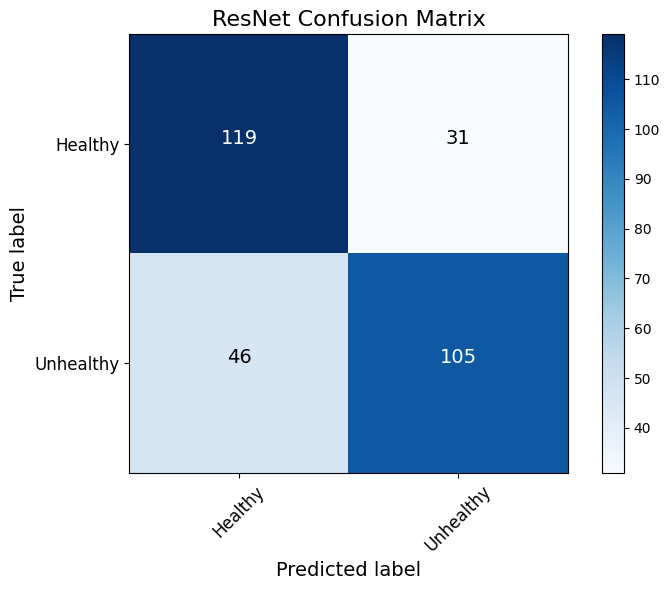

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.show()

# Compute Confusion Matrix
resnet_cm = confusion_matrix(resnet_y_true, resnet_y_pred_classes)
plot_confusion_matrix(resnet_cm, classes=resnet_target_names, title='ResNet Confusion Matrix')


In [90]:
# Save the trained ResNet model
resnet_2d_model.save("heart_sound_resnet_model.keras")
print("ResNet Model saved as 'heart_sound_resnet_model.keras'.")


ResNet Model saved as 'heart_sound_resnet_model.keras'.


In [91]:
from tensorflow.keras.models import load_model

# Load the trained ResNet model
resnet_model = load_model("heart_sound_resnet_model.keras")
print("ResNet Model loaded successfully.")


ResNet Model loaded successfully.


In [93]:
# Display the model summary to identify layers
resnet_model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 400, 25, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 200, 13, 64)    │          3,200 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_35    │ (None, 200, 13, 64)    │            256 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 200, 13, 64)    │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 100, 7, 64)     │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 100, 7, 64)     │            256 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 100, 7, 64)     │         36,928 │ activation_30[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 100, 7, 64)     │            256 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 100, 7, 64)     │              0 │ batch_normalization_3… │
│                           │                        │                │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_31             │ (None, 100, 7, 64)     │              0 │ add_12[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)   

 Total params: 8,650,952 (33.00 MB)

 Trainable params: 2,882,114 (10.99 MB)

 Non-trainable params: 4,608 (18.00 KB)

 Optimizer params: 5,764,230 (21.99 MB)

In [97]:
# Iterate through all layers and print their details
for idx, layer in enumerate(resnet_model.layers):
    layer_name = layer.name
    layer_type = layer.__class__.__name__

    # Safely attempt to get the output shape
    try:
        layer_output_shape = layer.output_shape
    except AttributeError:
        layer_output_shape = "N/A"  # Not Available for certain layers like InputLayer

    print(f"{idx + 1}. Layer Name: {layer_name}, Layer Type: {layer_type}, Output Shape: {layer_output_shape}")


1. Layer Name: input_layer_8, Layer Type: InputLayer, Output Shape: N/A
2. Layer Name: conv2d_19, Layer Type: Conv2D, Output Shape: N/A
3. Layer Name: batch_normalization_35, Layer Type: BatchNormalization, Output Shape: N/A
4. Layer Name: activation_28, Layer Type: Activation, Output Shape: N/A
5. Layer Name: conv2d_20, Layer Type: Conv2D, Output Shape: N/A
6. Layer Name: batch_normalization_36, Layer Type: BatchNormalization, Output Shape: N/A
7. Layer Name: activation_29, Layer Type: Activation, Output Shape: N/A
8. Layer Name: conv2d_21, Layer Type: Conv2D, Output Shape: N/A
9. Layer Name: batch_normalization_37, Layer Type: BatchNormalization, Output Shape: N/A
10. Layer Name: activation_30, Layer Type: Activation, Output Shape: N/A
11. Layer Name: conv2d_22, Layer Type: Conv2D, Output Shape: N/A
12. Layer Name: batch_normalization_38, Layer Type: BatchNormalization, Output Shape: N/A
13. Layer Name: add_12, Layer Type: Add, Output Shape: N/A
14. Layer Name: activation_31, Layer T

In [98]:
from tensorflow.keras.models import Model

# Specify the name of the layer from which to extract features
feature_layer_name = 'global_average_pooling2d_1'  # Replace with your layer's name

# Verify the layer exists
if feature_layer_name not in [layer.name for layer in resnet_model.layers]:
    raise ValueError(f"Layer '{feature_layer_name}' not found in the model. Please check the layer name.")

# Create the feature extractor model
feature_extractor = Model(inputs=resnet_model.input,
                          outputs=resnet_model.get_layer(feature_layer_name).output)

print(f"Feature extractor model created. Extracting features from layer: '{feature_layer_name}'")


Feature extractor model created. Extracting features from layer: 'global_average_pooling2d_1'


In [99]:
# Function to extract features and save as .npy files
def extract_and_save_features(model, data, dataset_name):
    """
    Extracts features using the provided model and saves them as a .npy file.

    Parameters:
    - model: Keras model used for feature extraction.
    - data: Numpy array of input data.
    - dataset_name: String indicating the dataset type ('train', 'val', 'test').

    Returns:
    - features: Extracted features as a Numpy array.
    """
    print(f"Extracting features for the {dataset_name} dataset...")
    features = model.predict(data, batch_size=16, verbose=1)
    np.save(f"{dataset_name}_features.npy", features)
    print(f"Features for the {dataset_name} dataset saved as '{dataset_name}_features.npy'.")
    return features

# Extract and save features for each dataset
train_features = extract_and_save_features(feature_extractor, x_train, 'train')
val_features = extract_and_save_features(feature_extractor, x_val, 'val')
test_features = extract_and_save_features(feature_extractor, test_x, 'test')


Extracting features for the train dataset...
130/130 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step
Features for the train dataset saved as 'train_features.npy'.
Extracting features for the val dataset...
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step
Features for the val dataset saved as 'val_features.npy'.
Extracting features for the test dataset...
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 433ms/step
Features for the test dataset saved as 'test_features.npy'.


In [100]:
# Load and verify the saved features
loaded_train_features = np.load("train_features.npy")
loaded_val_features = np.load("val_features.npy")
loaded_test_features = np.load("test_features.npy")

print(f"Loaded Training Features Shape: {loaded_train_features.shape}")
print(f"Loaded Validation Features Shape: {loaded_val_features.shape}")
print(f"Loaded Test Features Shape: {loaded_test_features.shape}")


Loaded Training Features Shape: (2073, 256)
Loaded Validation Features Shape: (519, 256)
Loaded Test Features Shape: (301, 256)


In [101]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the extracted features and labels
train_features = np.load("train_features.npy")
val_features = np.load("val_features.npy")
test_features = np.load("test_features.npy")

# Assuming y_train_encoded, y_val_encoded, y_test_encoded are already defined
# Convert one-hot encoded labels back to single labels
y_train = np.argmax(y_train_encoded, axis=1)
y_val = np.argmax(y_val_encoded, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)

# Train the classifier on training features
print("Training SVM classifier...")
svm_classifier.fit(train_features, y_train)
print("SVM training completed.")

# Evaluate on Validation Set
print("Evaluating on Validation Set...")
val_predictions = svm_classifier.predict(val_features)
print(classification_report(y_val, val_predictions, target_names=["Healthy", "Unhealthy"]))

# Evaluate on Test Set
print("Evaluating on Test Set...")
test_predictions = svm_classifier.predict(test_features)
print(classification_report(y_test, test_predictions, target_names=["Healthy", "Unhealthy"]))

# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(cm)


Training SVM classifier...
SVM training completed.
Evaluating on Validation Set...
              precision    recall  f1-score   support

     Healthy       0.92      0.95      0.94       412
   Unhealthy       0.79      0.67      0.73       107

    accuracy                           0.90       519
   macro avg       0.85      0.81      0.83       519
weighted avg       0.89      0.90      0.89       519

Evaluating on Test Set...
              precision    recall  f1-score   support

     Healthy       0.69      0.83      0.75       150
   Unhealthy       0.79      0.63      0.70       151

    accuracy                           0.73       301
   macro avg       0.74      0.73      0.73       301
weighted avg       0.74      0.73      0.72       301

Confusion Matrix:
[[124  26]
 [ 56  95]]
